In [24]:

import sys
import os
import random
import glob
import torch
import pandas as pd
sys.path.append("C:/Users/yuuta/Documents/fashion")
from utils.util import filter_basic_items, open_json
from utils.util import is_target_category
from utils.util import calculate_euclid_sum
from utils.infer import id_to_vector_in_versatility, id_to_vector
from utils.util import calc_roc_auc
from utils.util import  show_item


In [23]:
import importlib
import utils
importlib.reload(utils.util)

<module 'utils.util' from 'C:\\Users/yuuta/Documents/fashion\\utils\\util.py'>

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")  # GPUデバイスを取得
else:
    device = torch.device("cpu")  # CPUデバイスを取得

In [4]:
path = glob.glob(
    # "C:/Users/yuuta/Documents/fashion/data/negative_coordinates_random/**.json"
    "C:/Users/yuuta/Documents/fashion/data/test/**/*.json"
    # negative_coordinates_random
)

In [5]:
path[:5]

['C:/Users/yuuta/Documents/fashion/data/test\\1009646\\1562734_new.json',
 'C:/Users/yuuta/Documents/fashion/data/test\\1009646\\3069378_new.json',
 'C:/Users/yuuta/Documents/fashion/data/test\\1009646\\3072220_new.json',
 'C:/Users/yuuta/Documents/fashion/data/test\\1009646\\3072296_new.json',
 'C:/Users/yuuta/Documents/fashion/data/test\\1009646\\3072451_new.json']

In [41]:
vector_items = []

for fp in path[:10000]:
    json_dict = open_json(fp)
    items = filter_basic_items(json_dict["items"])
    for item in items:
        try:
            itemId = str(item["itemId"])
        except Exception as e:
            print(fp,':', itemId, " : ", e)
            continue

        # vector = id_to_vector_in_versatility(itemId)
        vector = id_to_vector_in_versatility(itemId)
        vector_items.append((itemId, torch.tensor(vector)))

C:\Users\yuuta\AppData\Local\Temp\ipykernel_12628\4073661838.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  vector_items.append((itemId, torch.tensor(vector)))


In [16]:
vector_items[0]

('8809392',
 tensor([[  0.2788,  -9.2883,  13.7461,  -0.3519,  -2.4053,   0.7699,  -6.3131,
           -6.0188, -11.1122,  -7.4297,   9.0639,  -7.8766,   2.5607,  -0.6832,
            7.2426,  -5.0296,   8.9894,   5.7833,  -4.9557,  19.3269,  -7.4544,
           -2.5510,  10.2110,  -4.7691,   1.0885,  -3.4826,  -8.4922,   1.9310,
          -13.9084,   9.6451,  -9.4955,   2.1019, -10.2109,  -1.8671, -16.9087,
           17.2281, -16.6501, -15.2828,  -5.9073,  24.5878, -16.1390,   9.4516,
           11.3574, -15.7752,  -1.2874,  -6.7601,  -6.6847,  -3.7873, -21.0966,
            2.0325,  -3.5598,   1.9270,  -0.7814,   6.5671,  -3.2451, -10.5175,
           11.8197,   0.2100, -14.1183,  17.7080,  10.9715,  10.6040,   1.7235,
            8.3248]], device='cuda:0'))

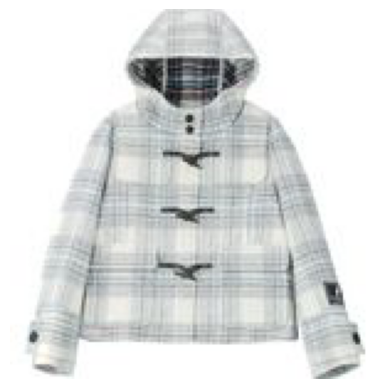

In [57]:
import random
index = random.randint(0, len(vector_items))
show_item(vector_items[index][0])

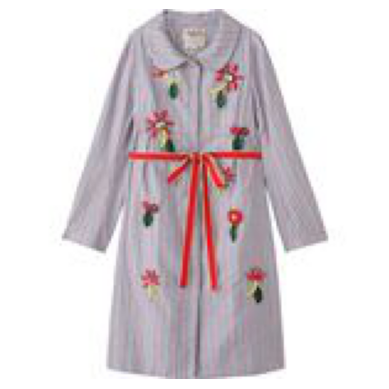

In [58]:
dist = 10e10
nearest_item_id = None
for itemId, vector in vector_items[1:]:
    if itemId == vector_items[index][0]:
        continue
    d = torch.norm(vector_items[index][1] - vector)
    # print(d, dist)
    if d < dist:
        dist = d
        nearest_item_id = itemId
show_item(nearest_item_id)

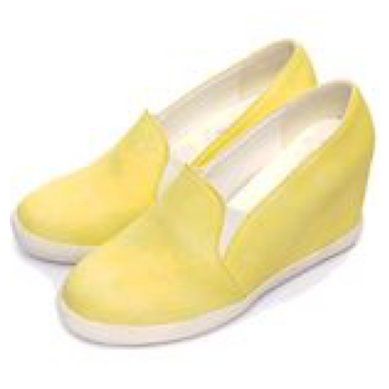